<a href="https://colab.research.google.com/github/Linitoo/Taller-1_estadistica-/blob/main/taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
Dataset descargado en: /kaggle/input/crop-recommendation-dataset
Primeras filas:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data column

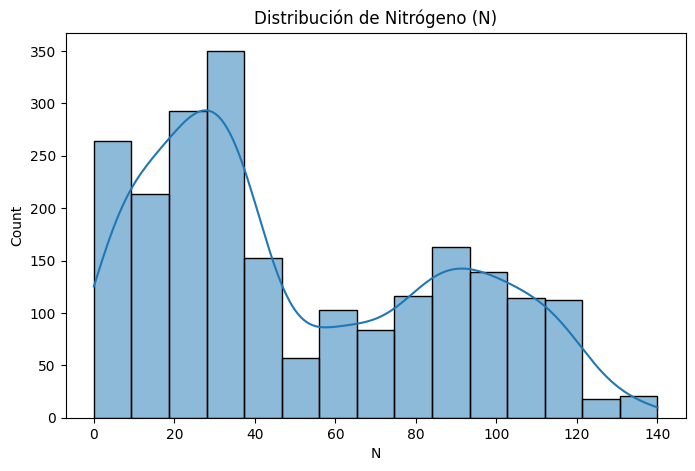

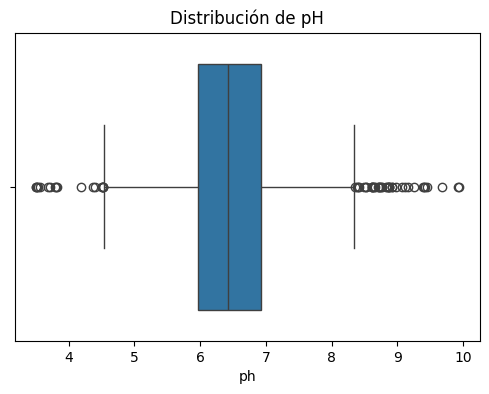

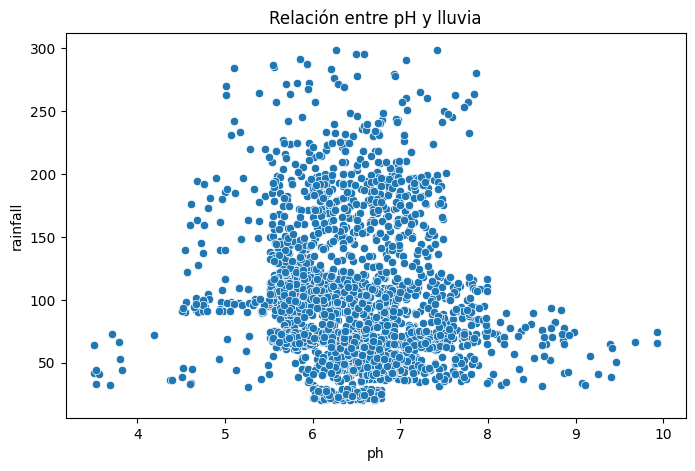

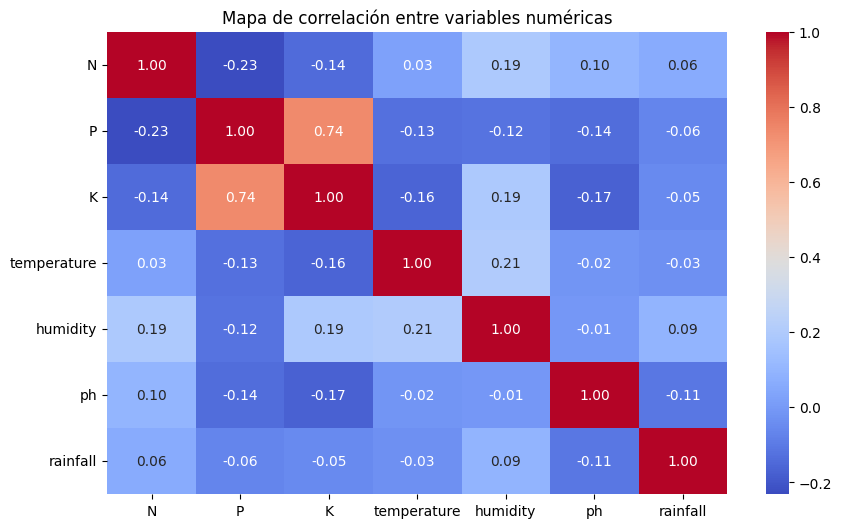


Cultivos disponibles en el dataset:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Promedios de N, P, K por cultivo:
                  N       P       K
label                              
apple         20.80  134.22  199.89
banana       100.23   82.01   50.05
blackgram     40.02   67.47   19.24
chickpea      40.09   67.79   79.92
coconut       21.98   16.93   30.59
coffee       101.20   28.74   29.94
cotton       117.77   46.24   19.56
grapes        23.18  132.53  200.11
jute          78.40   46.86   39.99
kidneybeans   20.75   67.54   20.05
lentil        18.77   68.36   19.41
maize         77.76   48.44   19.79
mango         20.07   27.18   29.92
mothbeans     21.44   48.01   20.23
mungbean      20.99   47.28   19.87
muskmelon    100.32   17.72   50.08
orange        19.58   16.55   10.01
papaya        49

In [ ]:
# ============================================
# 1. Instalación de librerías (solo primera vez)
# ============================================
!pip install kagglehub pandas seaborn matplotlib

# ============================================
# 2. Importar librerías
# ============================================
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================
# 3. Descargar y cargar el dataset
# ============================================
# Descarga desde Kaggle con kagglehub
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")
print("Dataset descargado en:", path)

# Cargar el archivo principal
df = pd.read_csv(path + "/Crop_recommendation.csv")

# ============================================
# 4. Exploración inicial
# ============================================
print("Primeras filas:")
print(df.head(10))

print("\nInformación del dataset:")
print(df.info())

print("\nResumen estadístico:")
print(df.describe())

# ============================================
# 5. Valores nulos
# ============================================
print("\nValores nulos por columna:")
print(df.isnull().sum())

# ============================================
# 6. Visualizaciones básicas
# ============================================

# Histograma de Nitrógeno
plt.figure(figsize=(8,5))
sns.histplot(df["N"], kde=True)
plt.title("Distribución de Nitrógeno (N)")
plt.show()

# Boxplot del pH
plt.figure(figsize=(6,4))
sns.boxplot(x=df["ph"])
plt.title("Distribución de pH")
plt.show()

# Dispersión: relación entre pH y lluvia
plt.figure(figsize=(8,5))
sns.scatterplot(x="ph", y="rainfall", data=df)
plt.title("Relación entre pH y lluvia")
plt.show()

# ============================================
# 7. Heatmap de correlación
# ============================================
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

# ============================================
# 8. Análisis agrupado por cultivo
# ============================================
print("\nCultivos disponibles en el dataset:")
print(df["label"].unique())

# Promedio de N, P, K por cultivo
promedios = df.groupby("label")[["N","P","K"]].mean()
print("\nPromedios de N, P, K por cultivo:")
print(promedios)
